In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import scipy.io as spio

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter

from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr

from scipy.stats import norm

import isolearn.io as isoio

from analyze_leslie_apadb_celltypes_helpers import *


In [2]:
#Load Leslie/APADB data
leslie_tissue_index = np.array(['hek293', 'mcf10a_hras2', 'mcf10a1', 'mcf10a2', 'mcf10a_hras1', 'bcells1', 'mcf7', 'bcells2', 'ovary', 'breast', 'brain', 'skmuscle', 'blcl', 'hES', 'testis', 'hela', 'ntera'], dtype=np.object)
apadb_tissue_index = np.array(['kidney', 'pancreas', 'monocytes', 'all', 'pdac', 'prcc', 'full_blood', 'hlf'], dtype=np.object)

#Load PAS dataframe and cut matrix
native_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_data/apa_leslie_apadb_data')

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned_padded'
pred_dict = isoio.load('predictions/apa_leslie_apadb_data/' + model_name + '_predictions')

#Join measurements with predictions
df, leslie_isoform_count, apadb_isoform_count, leslie_cleavage_count_dict, leslie_cleavage_prob_dict, pred_cleavage_prob = join_pas_dataframes(native_dict, pred_dict, leslie_tissue_index, apadb_tissue_index)

#Load Leslie/APADB pairwise APA dataframe
pair_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_pair_data/apa_leslie_apadb_pair_data')

#Load predictions
model_name = 'aparent_apadb_fitted_legacy_pasaligned_padded'
pair_pred_dict = isoio.load('predictions/apa_leslie_apadb_pair_data/' + model_name + '_predictions')

#Join measurements with predictions
pair_df, leslie_cleavage_count_prox_dict, leslie_cleavage_prob_prox_dict, leslie_cleavage_count_dist_dict, leslie_cleavage_prob_dist_dict, pred_cleavage_prob_prox, pred_cleavage_prob_dist = join_apa_dataframes(pair_dict, pair_pred_dict, leslie_tissue_index, apadb_tissue_index)


Leslie pair-wise APA site usage correlation (across cell types).


/home/johli/anaconda3/envs/aparent/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


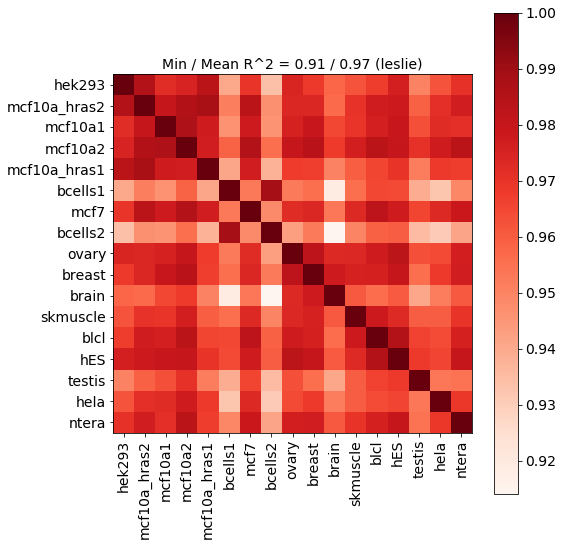

APADB pair-wise APA site usage correlation (across cell types).


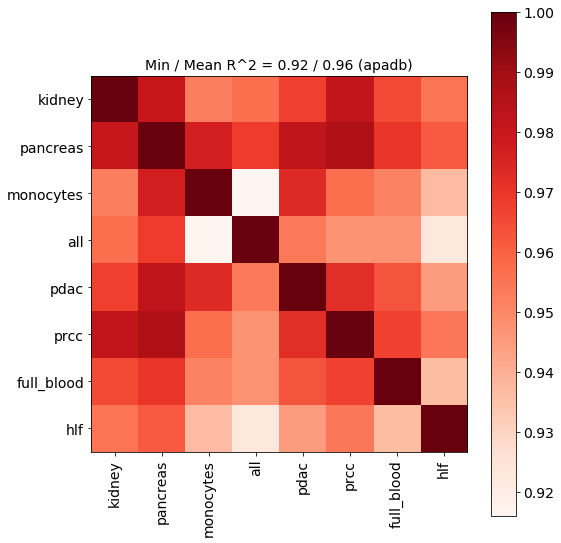

In [3]:
#Differential pair-wise APA site usage analysis
site_nums = None
site_types = ['UTR3', 'Extension']
pseudo_count = 0.1
min_total_count = 20
only_differentials = False
use_logodds = False
fixed_isoform_difference = 0.25


print("Leslie pair-wise APA site usage correlation (across cell types).")

[source_data, tissue_index, suffix_index] = ('leslie', leslie_tissue_index, np.array(['_apadb_region'] * leslie_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_differential_usage_heatmap(r2_map, source_data, tissue_index)

print("APADB pair-wise APA site usage correlation (across cell types).")

[source_data, tissue_index, suffix_index] = ('apadb', apadb_tissue_index, np.array([''] * apadb_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_differential_usage_heatmap(r2_map, source_data, tissue_index)


Leslie mean isoform usage difference (across cell types, total site usage).


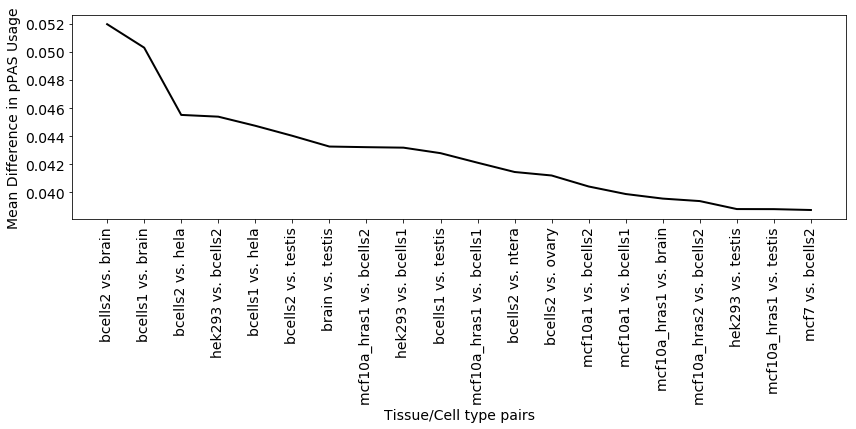

APADB mean isoform usage difference (across cell types, total site usage).


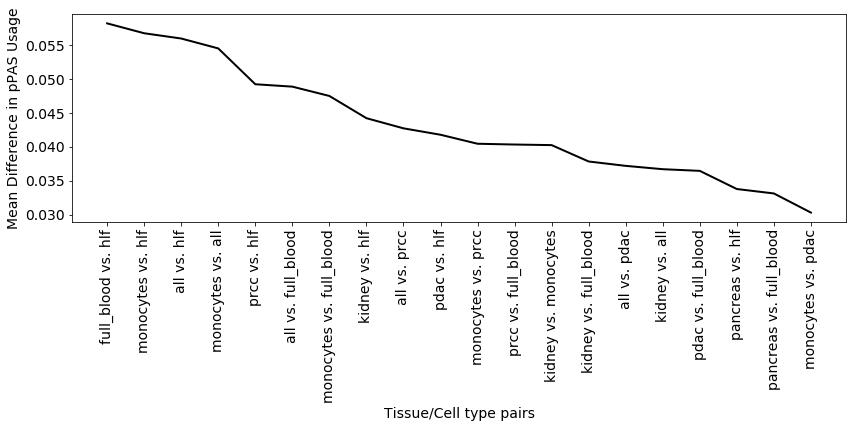

In [4]:
print("Leslie mean isoform usage difference (across cell types, total site usage).")

[source_data, tissue_index, suffix_index] = ('leslie', leslie_tissue_index, np.array(['_apadb_region'] * leslie_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_mean_absolute_difference(mae_map, tissue_index, top_n=20)

print("APADB mean isoform usage difference (across cell types, total site usage).")

[source_data, tissue_index, suffix_index] = ('apadb', apadb_tissue_index, np.array([''] * apadb_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_mean_absolute_difference(mae_map, tissue_index, top_n=20)


Leslie fraction of sites with high differential usage (across cell types, total site usage).


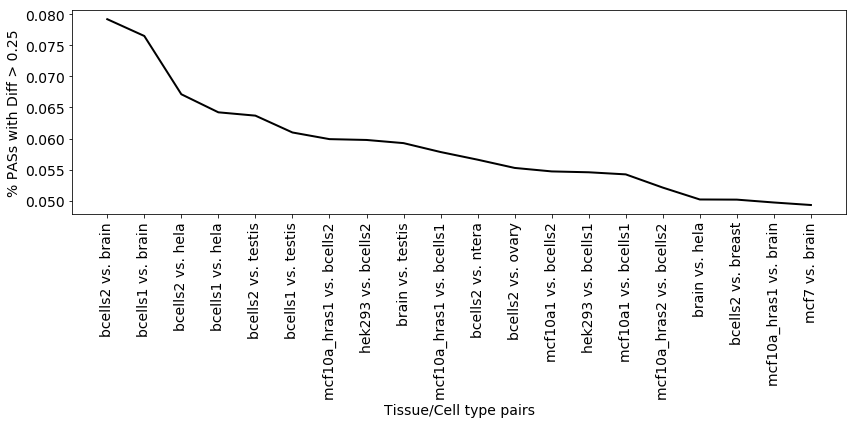

APADB fraction of sites with high differential usage (across cell types, total site usage).


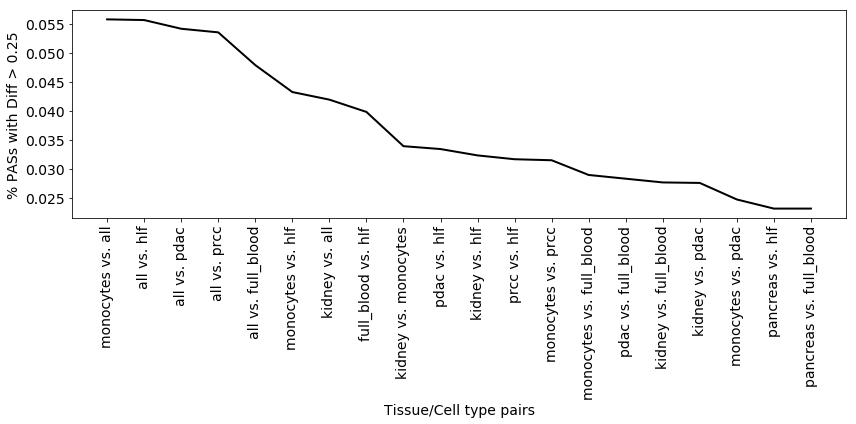

In [5]:
print("Leslie fraction of sites with high differential usage (across cell types, total site usage).")

[source_data, tissue_index, suffix_index] = ('leslie', leslie_tissue_index, np.array(['_apadb_region'] * leslie_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_fraction_of_isoform_difference(fixed_isoform_diff_map, tissue_index, fixed_isoform_difference, top_n=20)

print("APADB fraction of sites with high differential usage (across cell types, total site usage).")

[source_data, tissue_index, suffix_index] = ('apadb', apadb_tissue_index, np.array([''] * apadb_tissue_index.shape[0], dtype=np.object))
r2_map, mae_map, fixed_isoform_diff_map = get_differential_usage_statistics(pair_df, source_data, tissue_index, suffix_index, site_nums, site_types, pseudo_count, min_total_count, only_differentials, use_logodds, fixed_isoform_difference, total_count_str='pair_count')
plot_fraction_of_isoform_difference(fixed_isoform_diff_map, tissue_index, fixed_isoform_difference, top_n=20)
